# Import Libraries

In [58]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable


In [59]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [60]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [1]:
#Install Packages
!pip install app-store-scraper
!pip install wordcloud

#Import Libraries
from app_store_scraper import AppStore

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
import json,os,uuid
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mbkhn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

# Data Collection

In [3]:
#Collect all the ChatGPT reviews from App Store
a_reviews = AppStore('us','facebook','284882215')
a_reviews.review(sleep=1)

2023-10-30 00:23:48,098 [INFO] Base - Initialised: AppStore('us', 'facebook', 284882215)
2023-10-30 00:23:48,098 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/facebook/id284882215
2023-10-30 00:23:53,679 [INFO] Base - [id:284882215] Fetched 60 reviews (60 fetched in total)
2023-10-30 00:24:01,911 [INFO] Base - [id:284882215] Fetched 140 reviews (140 fetched in total)
2023-10-30 00:24:10,656 [INFO] Base - [id:284882215] Fetched 220 reviews (220 fetched in total)
2023-10-30 00:24:18,412 [INFO] Base - [id:284882215] Fetched 300 reviews (300 fetched in total)
2023-10-30 00:24:26,925 [INFO] Base - [id:284882215] Fetched 380 reviews (380 fetched in total)
2023-10-30 00:24:35,649 [INFO] Base - [id:284882215] Fetched 460 reviews (460 fetched in total)
2023-10-30 00:24:44,084 [INFO] Base - [id:284882215] Fetched 520 reviews (520 fetched in total)
2023-10-30 00:24:53,705 [INFO] Base - [id:284882215] Fetched 600 reviews (600 fetched in total)
2023-10-30 00:25:03,761 [IN

2023-10-30 00:36:26,854 [INFO] Base - [id:284882215] Fetched 6180 reviews (6180 fetched in total)
2023-10-30 00:36:35,313 [INFO] Base - [id:284882215] Fetched 6260 reviews (6260 fetched in total)
2023-10-30 00:36:43,263 [INFO] Base - [id:284882215] Fetched 6340 reviews (6340 fetched in total)
2023-10-30 00:36:52,162 [INFO] Base - [id:284882215] Fetched 6420 reviews (6420 fetched in total)
2023-10-30 00:37:01,129 [INFO] Base - [id:284882215] Fetched 6500 reviews (6500 fetched in total)
2023-10-30 00:37:09,254 [INFO] Base - [id:284882215] Fetched 6580 reviews (6580 fetched in total)
2023-10-30 00:37:17,661 [INFO] Base - [id:284882215] Fetched 6660 reviews (6660 fetched in total)
2023-10-30 00:37:26,135 [INFO] Base - [id:284882215] Fetched 6740 reviews (6740 fetched in total)
2023-10-30 00:37:34,044 [INFO] Base - [id:284882215] Fetched 6820 reviews (6820 fetched in total)
2023-10-30 00:37:41,660 [INFO] Base - [id:284882215] Fetched 6900 reviews (6900 fetched in total)
2023-10-30 00:37:49,

2023-10-30 00:48:14,692 [INFO] Base - [id:284882215] Fetched 12680 reviews (12680 fetched in total)
2023-10-30 00:48:22,667 [INFO] Base - [id:284882215] Fetched 12760 reviews (12760 fetched in total)
2023-10-30 00:48:30,646 [INFO] Base - [id:284882215] Fetched 12840 reviews (12840 fetched in total)
2023-10-30 00:48:38,346 [INFO] Base - [id:284882215] Fetched 12920 reviews (12920 fetched in total)
2023-10-30 00:48:45,592 [INFO] Base - [id:284882215] Fetched 12980 reviews (12980 fetched in total)
2023-10-30 00:48:54,115 [INFO] Base - [id:284882215] Fetched 13060 reviews (13060 fetched in total)
2023-10-30 00:49:02,470 [INFO] Base - [id:284882215] Fetched 13140 reviews (13140 fetched in total)
2023-10-30 00:49:10,179 [INFO] Base - [id:284882215] Fetched 13220 reviews (13220 fetched in total)
2023-10-30 00:49:18,132 [INFO] Base - [id:284882215] Fetched 13300 reviews (13300 fetched in total)
2023-10-30 00:49:26,323 [INFO] Base - [id:284882215] Fetched 13380 reviews (13380 fetched in total)


2023-10-30 01:01:16,001 [INFO] Base - [id:284882215] Fetched 18940 reviews (18940 fetched in total)
2023-10-30 01:01:23,361 [INFO] Base - [id:284882215] Fetched 19000 reviews (19000 fetched in total)
2023-10-30 01:01:32,398 [INFO] Base - [id:284882215] Fetched 19080 reviews (19080 fetched in total)
2023-10-30 01:01:42,112 [INFO] Base - [id:284882215] Fetched 19160 reviews (19160 fetched in total)
2023-10-30 01:01:51,466 [INFO] Base - [id:284882215] Fetched 19240 reviews (19240 fetched in total)
2023-10-30 01:02:00,269 [INFO] Base - [id:284882215] Fetched 19320 reviews (19320 fetched in total)
2023-10-30 01:02:09,333 [INFO] Base - [id:284882215] Fetched 19400 reviews (19400 fetched in total)
2023-10-30 01:02:23,575 [INFO] Base - [id:284882215] Fetched 19460 reviews (19460 fetched in total)
2023-10-30 01:02:32,332 [INFO] Base - [id:284882215] Fetched 19540 reviews (19540 fetched in total)
2023-10-30 01:02:40,845 [INFO] Base - [id:284882215] Fetched 19620 reviews (19620 fetched in total)


In [6]:
data = pd.DataFrame(np.array(a_reviews.reviews),columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
data.head()

,date,review,rating,isEdited,title,userName
0,2022-11-07 19:35:40,I think it’s silly to pretend that the overall...,2,False,Lack of Customer Service,Vv_/
1,2023-04-01 19:24:38,My mom made a new account which in it of itsel...,1,False,Facebook is a joke of a social media app and t...,Estella05
2,2023-03-31 04:37:05,"this is supposed to be a ""Open opinion"" no jud...",1,False,FACEBOOK IS THE MOST HYPOCRITICAL APP AND POSS...,Sncndbbsva
3,2023-03-26 19:49:24,"this is supposed to be a ""Open opinion"" no jud...",1,False,FACEBOOK IS THE MOST HYPOCRITICAL APP AND POSS...,no19998
4,2023-04-15 09:36:20,"I can't believe you guys, it's annoying to not...",1,False,Not tagging people (specifically) The set up i...,NiallsBunny69


In [7]:
data.shape

(19980, 6)

In [8]:
data.drop(['isEdited','userName'],axis=1,inplace=True) #Delete columns
data = data[['date','title','review','rating']] #Rearrange columns
data.head()

,date,title,review,rating
0,2022-11-07 19:35:40,Lack of Customer Service,I think it’s silly to pretend that the overall...,2
1,2023-04-01 19:24:38,Facebook is a joke of a social media app and t...,My mom made a new account which in it of itsel...,1
2,2023-03-31 04:37:05,FACEBOOK IS THE MOST HYPOCRITICAL APP AND POSS...,"this is supposed to be a ""Open opinion"" no jud...",1
3,2023-03-26 19:49:24,FACEBOOK IS THE MOST HYPOCRITICAL APP AND POSS...,"this is supposed to be a ""Open opinion"" no jud...",1
4,2023-04-15 09:36:20,Not tagging people (specifically) The set up i...,"I can't believe you guys, it's annoying to not...",1


In [9]:
#Storing Data
data.to_csv('facebook_reviews.csv',index=False)

In [10]:
data.to_excel('facebook_reviews.xlsx', index=False)

# Exploratory Data Analysis

In [11]:
data = pd.read_csv('facebook_reviews.csv')

In [12]:
data.shape

(19980, 4)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    19980 non-null  object
 1   title   19980 non-null  object
 2   review  19980 non-null  object
 3   rating  19980 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 624.5+ KB


In [14]:
data.describe()

,rating
count,19980.000000
mean,1.661912
std,1.144349
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


In [15]:
data.describe(include='object')

,date,title,review
count,19980,19980,19980
unique,19976,16880,19978
top,2023-03-26 16:25:19,Censorship,Facebook is infringing on The rights of free s...
freq,2,207,2


<h3> Analysis of Rating column </h3>

In [16]:
#Rating Distribution
data['rating'].value_counts().sort_index()

1    13463
2     2807
3     1852
4      718
5     1140
Name: rating, dtype: int64

In [17]:
data['rating'].value_counts(normalize=True).mul(100).round(2).sort_index()

1    67.38
2    14.05
3     9.27
4     3.59
5     5.71
Name: rating, dtype: float64

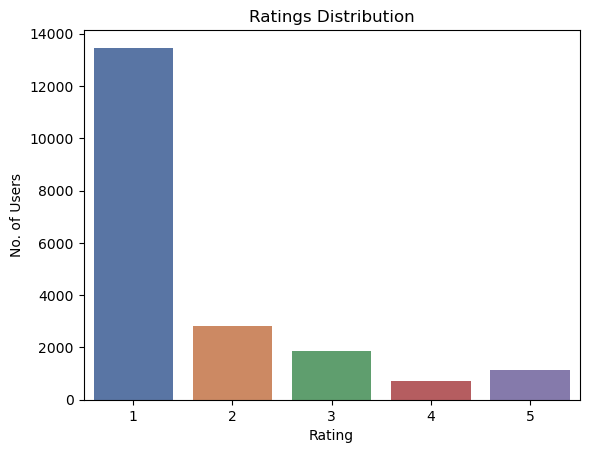

In [18]:
#Plot
palette = "deep"
sns.set_palette(palette)

sns.countplot(data=data, x='rating')

plt.xlabel('Rating')
plt.ylabel('No. of Users')
plt.title('Ratings Distribution')

plt.show()

# Data Preprocessing

In [19]:
#Find no. of missing values in each column
data.isnull().sum().sort_values(ascending=False)

date      0
title     0
review    0
rating    0
dtype: int64

In [20]:
#Combine Review Time and Review
data['complete_review'] = data['title'] +' .'+data['review']

In [21]:
#Drop some columns which we won't use for sentiment analysis of review
remove_cols = ['date','review','title']
data = data.drop(remove_cols,axis='columns')

In [22]:
data.head()

,rating,complete_review
0,2,Lack of Customer Service .I think it’s silly t...
1,1,Facebook is a joke of a social media app and t...
2,1,FACEBOOK IS THE MOST HYPOCRITICAL APP AND POSS...
3,1,FACEBOOK IS THE MOST HYPOCRITICAL APP AND POSS...
4,1,Not tagging people (specifically) The set up i...


1. Convert all the reviews to lowercase

In [23]:
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['complete_review'].head()

0    lack of customer service .i think it’s silly t...
1    facebook is a joke of a social media app and t...
2    facebook is the most hypocritical app and poss...
3    facebook is the most hypocritical app and poss...
4    not tagging people (specifically) the set up i...
Name: complete_review, dtype: object

2. Remove Punctuation

In [24]:
data['complete_review'] = data['complete_review'].str.replace('[^\w\s]','')

3. Remove Emojis

In [25]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
data['complete_review'] = data['complete_review'].apply(lambda x: remove_emoji(x))

4. Remove Stopwords

Stopwords are commonly used words (i.e. “the”, “a”, “an”) that do not add meaning to a sentence and can be ignored without having a drastic effect on the meaning of the sentence.

In [26]:
stop = stopwords.words('english')
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

5. Apply Lemmatization

In [27]:
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
data['complete_review']= data['complete_review'].apply(space)

NameError: name 'nlp' is not defined

6. Remove certain words

  These are specific to app and won't show any sentiments

In [36]:
words_to_remove = ['facebook','app','one','fb','book','iphone','ipad','dont','dont know','nothing']
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x for x in x.split() if x not in words_to_remove))

7. Map ratings to positive, negative & neutral sentiment

0 will represent negative sentiment

1 will represent neutral sentiment

2 will represent positive sentiment


In [37]:
data['sentiment'] = data['rating'].apply(lambda rating: 2 if rating > 3 else (1 if rating == 3 else 0))
data.head(5)

,rating,complete_review,sentiment
0,2,lack customer service think silly pretend over...,0
1,1,joke social media mom made new account difficu...,0
2,1,hypocritical possibly worst social media apps ...,0
3,1,hypocritical possibly worst social media apps ...,0
4,1,tagging people specifically set annoying cant ...,0


In [38]:
data['sentiment'].value_counts(normalize=True).mul(100).round(2)

0    81.43
2     9.30
1     9.27
Name: sentiment, dtype: float64

Data is Imbalanced as about 66% of sentiment is positive, 24% is negative and 9.5% is neutral.

# Reviews Analysis

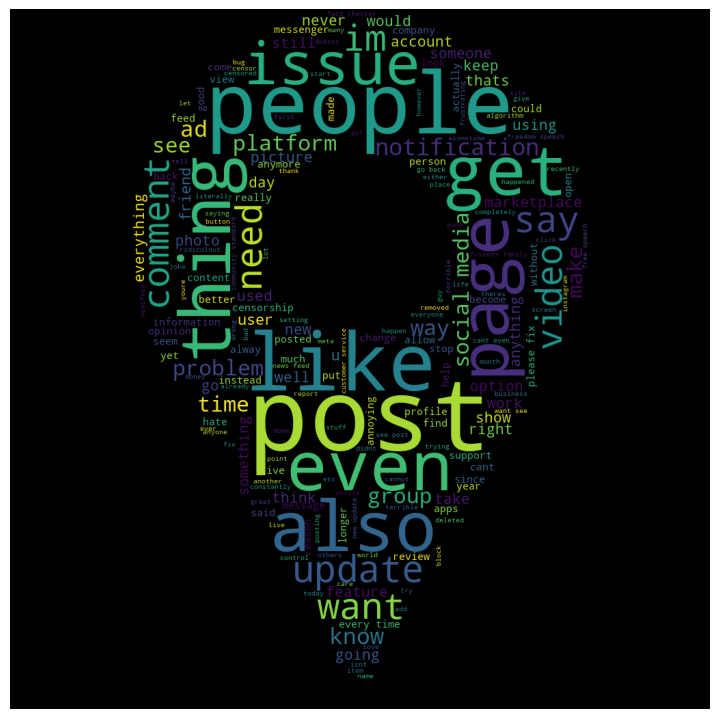

In [39]:
#Analysis of Review field
stopword = set(stopwords.words('english'))
text = " ".join(review for review in data.complete_review)
mask = np.array(Image.open("loc.png"))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('review_sentiment.png')
plt.show()

In [40]:
#positive negative & neutral sentiment:
positive = data[data['sentiment'] == 2]
negative = data[data['sentiment'] == 0]
neutral = data[data['sentiment'] == 1]

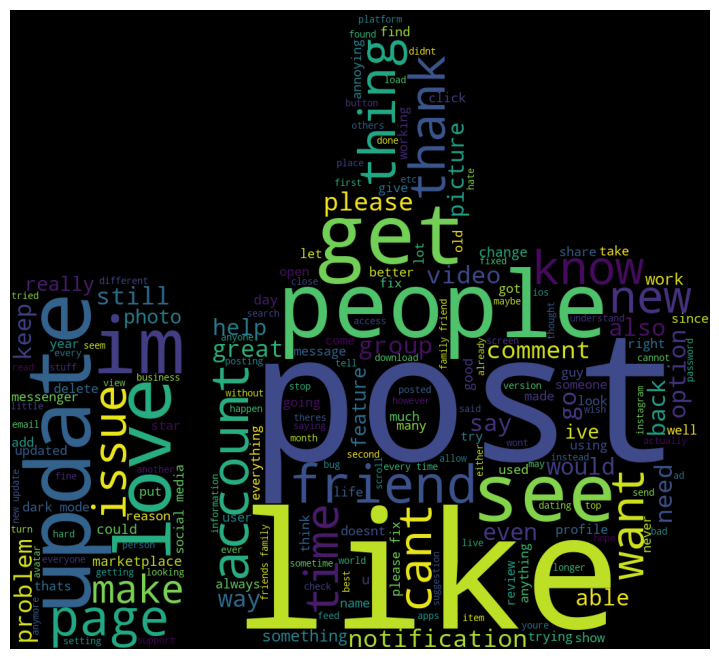

In [41]:
#Positive Setiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in positive.complete_review)
mask = np.array(Image.open("thumbs_up.png"))
wordcloud = WordCloud(width = 2200, height = 2300,
                background_color ='black',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('positive_sentiment.png')
plt.show()
wordcloud.to_file("posid.png")

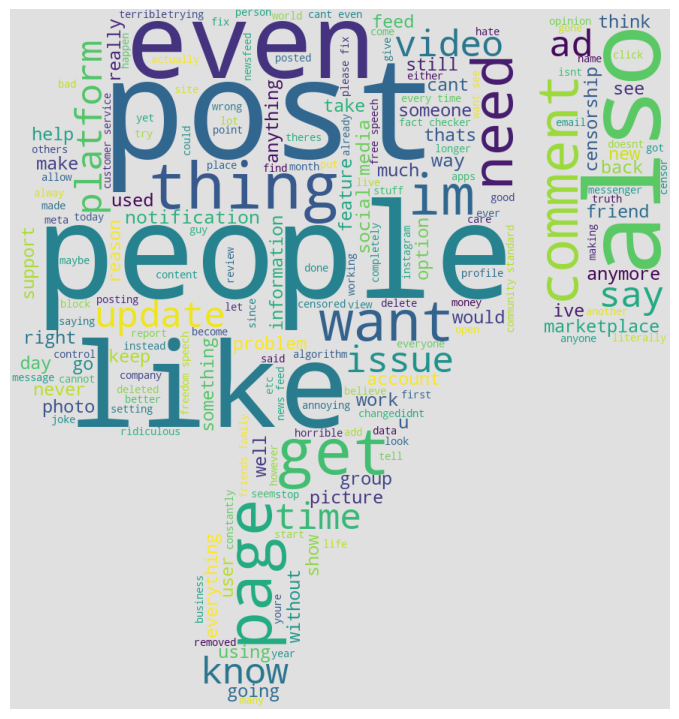

In [42]:
#Negative Setiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in negative.complete_review)
mask = np.array(Image.open("./thumbs_down.png"))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='#E0E0E0',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('negative_sentiment.png')
plt.show()

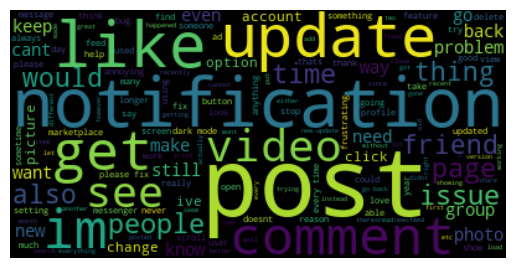

In [43]:
#Neutral Sentiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in neutral.complete_review)
wordcloud = WordCloud(stopwords=stopword).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis Model

<h3> Bag of Word Vectorization </h3>

In [44]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
X = cv.fit_transform(data['complete_review'])
y = data['sentiment']

<h3> Handle Imbalanced Data </h3>

In [45]:
# Instantiate the SMOTE object
smote = SMOTE()

# Perform oversampling
X_oversampled, y_oversampled = smote.fit_resample(X, y)

<h3> Train Test Split </h3>

In [46]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X_oversampled,
                                                  y_oversampled,
                                                  test_size=0.15,
                                                  random_state=17,stratify=y_oversampled)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41488, 27545)
(7322, 27545)
(41488,)
(7322,)


<h3> Multinomial Naive Bayes </h3>

In [47]:
#Training the model
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

#Caluclating the accuracy score of the model
y_pred = MNB.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      2704
           1       0.80      0.61      0.69      3217
           2       0.45      0.79      0.57      1401

    accuracy                           0.68      7322
   macro avg       0.68      0.70      0.67      7322
weighted avg       0.73      0.68      0.69      7322



<h3> Logistic Regression </h3>

In [48]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2407
           1       0.75      0.78      0.76      2332
           2       0.83      0.78      0.80      2583

    accuracy                           0.82      7322
   macro avg       0.82      0.82      0.82      7322
weighted avg       0.82      0.82      0.82      7322



<h3> Random Forest </h3>

In [53]:
# Initialize and train the random forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2540
           1       0.88      0.88      0.88      2436
           2       0.90      0.93      0.92      2346

    accuracy                           0.90      7322
   macro avg       0.90      0.91      0.90      7322
weighted avg       0.91      0.90      0.90      7322



<h3> XGBoost </h3>

In [54]:
# Create DMatrix for training and testing data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Set the objective function for multi-class classification
    'num_class': 3,      # Number of classes in the dataset
    'eval_metric': 'merror',        # Evaluation metric (multi-class classification error rate)
    'eta': 0.4,                    # Learning rate
    'max_depth': 6,                # Maximum depth of a tree
    'subsample': 0.8,              # Subsample ratio of the training instances
    'colsample_bytree': 0.8,       # Subsample ratio of features when constructing each tree
    'seed': 42                     # Random seed for reproducibility
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the testing data
preds = model.predict(dtest)
pred_labels = [int(pred) for pred in preds]

print(classification_report(pred_labels, y_test))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      2770
           1       0.89      0.98      0.94      2216
           2       0.93      0.97      0.95      2336

    accuracy                           0.93      7322
   macro avg       0.93      0.94      0.94      7322
weighted avg       0.94      0.93      0.93      7322



#Conclusion

The best-performing model was identified as XGBoost, which achieved an accuracy of 87% with the f1-score of 0.85 and above for all the labels(positive,negative & neutral). This model demonstrates the ability to accurately predict sentiment based on Facebook reviews.

Overall, with the developed sentiment analysis model, we can effectively analyze and understand the sentiment expressed in Facebook reviews. This provides valuable insights for businesses, helping them make informed decisions, improve customer satisfaction, and enhance their products and services based on customer feedback.